<a href="https://colab.research.google.com/github/SHUBHAM54444/CAPSTAN_PROJECT5444/blob/main/ML_Project_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Range Prediction




##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Name  -**  Shubham raju kadu

# **Project Summary -**

This dataset is mobile price range dataset,in this dataset we have 2000 ROW and 21 COLUMNS.On analasying  this problem we observed that the problem is classification problem our primery goal is predict classifire to detect price ranges of test data based on provide training data.

Analysing the dataset by using Exploratory Data Analysis using exponential moving avarages analyse trends and seasonality in Mobile price range dataset. we use 1)Decision Tree Classifier  2) Support Vector Classifier 3)Logestic Regresion 

By applying above algoritham we find accuracy is 95% by Logestic Regresion. 



# **GitHub Link -**

# **Problem Statement**


Mobile phones have becomes great necessity for almost all individuals now days.People want more features and best specification in phone and that too at cheaper cost.

Price of mobile phones is influenced by different factor.brand name,newness of the model,internal memory,ram,size,connectivity are some of the important factor in determining the price.As a business point of viwe, it become an almost  priority to analyse the factor from time to time and come up with best set of specification and price range so that pepole buy their mobile phones.

Hence,through this excerise and our predication we will try to help cpmpanies estimate price range competition to other manufacture and also it will be useful  for customers to verify the price of mobile.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [52]:
# Import libraies
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from datetime import datetime
%matplotlib inline
import seaborn as sns 
import plotly.express as px 
import ast
import math 
import random
import pickle
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import skew 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [53]:
# Loading dataset
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
df=pd.read_csv("/content/drive/MyDrive/zoom5444/data_mobile_price_range.csv")

### Dataset First View

In [55]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [56]:
# 2000 Row and 21 columns
df.shape

(2000, 21)

### Dataset Information

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [58]:
# find duplicated value of  dataset 
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [59]:
# find null value of dataset
print(df.isnull().sum())


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


<Axes: >

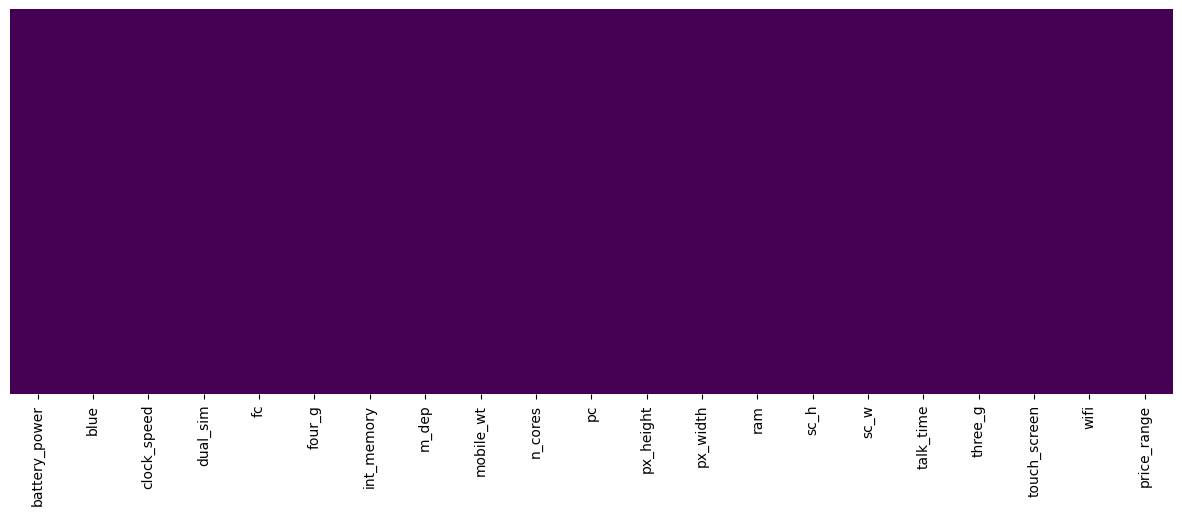

In [60]:
# we can use heatmap for visualization null values.
# yellow color is represent null values in each columns.
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


### What did you know about your dataset?

In this dataset 2000 Row and 21 columns are present, null value are zero,2 columns datatype float and 19 columns datatype is int.

## ***2. Understanding Your Variables***

In [61]:
# dataset columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [62]:
# dataset describe
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Variables Description 

**Total Rows=2000**

**Total Features=21**

**Battery power-** Total energy a battery can store one time measured in mAh.

**Blue-** Has bluetooth or not.0 is not and 1 is yes

**Clock speed-**speed at which microprocessor executes instruction.

**Dual sim-** Has dual SIM support or not.0 is not and 1 is yes

**Fc-** Front camera mega pixels.

**Four_g-**Has 4G or not.0 is not and 1 is yes

**Int_memory-** Internal Memory in Gigabytes

**M_Dep-** mobile depth in cm.

**Mobile_wt-** weight of mobile phone.

**N_cores-**Number of cores of processor.

**Pc-**primary camera mega pixels.

**Px_height and px_width** Pixel resolution height and width

**RAM-**Random Access Memory in mega bytes

**Sc_h and Sc_w-**Screen height and width of mobile in cm 

**Talk_Time**-  Longest time that a single battery charge will last

**Three_g-** Hag 3G or not.0 is not and 1 is yes 

**Touch_screen-** Has touch screen ore not.0 is not and 1 is yes 

**WiFi-** Has wifi or not.0 is not and 1 is yes

**Price_range-** This is target variable with value of 0(low cost), 1(medium cost),  2(high cost)  and   3(very high cost)

### Check Unique Values for each variable.

In [63]:
# we apply lambda funtion to chake unique value of each columns.
print(df.apply(lambda columns:columns.unique()))

battery_power    [842, 1021, 563, 615, 1821, 1859, 1954, 1445, ...
blue                                                        [0, 1]
clock_speed      [2.2, 0.5, 2.5, 1.2, 1.7, 0.6, 2.9, 2.8, 2.1, ...
dual_sim                                                    [0, 1]
fc               [1, 0, 2, 13, 3, 4, 5, 7, 11, 12, 16, 6, 15, 8...
four_g                                                      [0, 1]
int_memory       [7, 53, 41, 10, 44, 22, 24, 9, 33, 17, 52, 46,...
m_dep            [0.6, 0.7, 0.9, 0.8, 0.1, 0.5, 1.0, 0.3, 0.4, ...
mobile_wt        [188, 136, 145, 131, 141, 164, 139, 187, 174, ...
n_cores                                   [2, 3, 5, 6, 1, 8, 4, 7]
pc               [2, 6, 9, 14, 7, 10, 0, 15, 1, 18, 17, 11, 16,...
px_height        [20, 905, 1263, 1216, 1208, 1004, 381, 512, 38...
px_width         [756, 1988, 1716, 1786, 1212, 1654, 1018, 1149...
ram              [2549, 2631, 2603, 2769, 1411, 1067, 3220, 700...
sc_h             [9, 17, 11, 16, 8, 13, 19, 5, 14, 18, 7, 10, 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [64]:
# chake percentage of null values in dataset each columns. 
null_value=df.isnull().sum()/len(df)
print(null_value)

battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64


In [65]:
# how many unique value present in each columns
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  battery_power is 1094 .
No. of unique values in  blue is 2 .
No. of unique values in  clock_speed is 26 .
No. of unique values in  dual_sim is 2 .
No. of unique values in  fc is 20 .
No. of unique values in  four_g is 2 .
No. of unique values in  int_memory is 63 .
No. of unique values in  m_dep is 10 .
No. of unique values in  mobile_wt is 121 .
No. of unique values in  n_cores is 8 .
No. of unique values in  pc is 21 .
No. of unique values in  px_height is 1137 .
No. of unique values in  px_width is 1109 .
No. of unique values in  ram is 1562 .
No. of unique values in  sc_h is 15 .
No. of unique values in  sc_w is 19 .
No. of unique values in  talk_time is 19 .
No. of unique values in  three_g is 2 .
No. of unique values in  touch_screen is 2 .
No. of unique values in  wifi is 2 .
No. of unique values in  price_range is 4 .


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## **4. Data Vizualization, Storytelling & Experimenting with charts**

<Axes: xlabel='price_range', ylabel='count'>

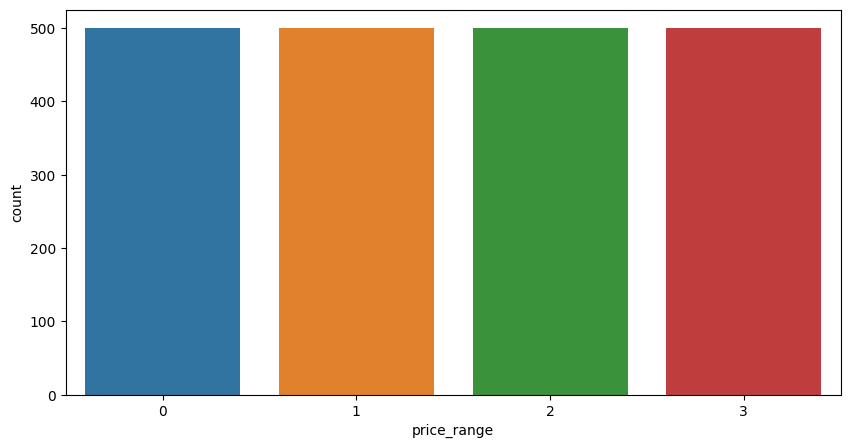

In [67]:
# we plot for count plot for dependent variable
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='price_range')

#### 1. Why did you pick the specific chart?

In this chart we presented price_range, this chart esay to uderstand which price range had how many value

#### 2. What is/are the insight(s) found from the chart?

In this count plot we seen eqval value are all four variable this is balance dataset.

<Axes: xlabel='dual_sim', ylabel='count'>

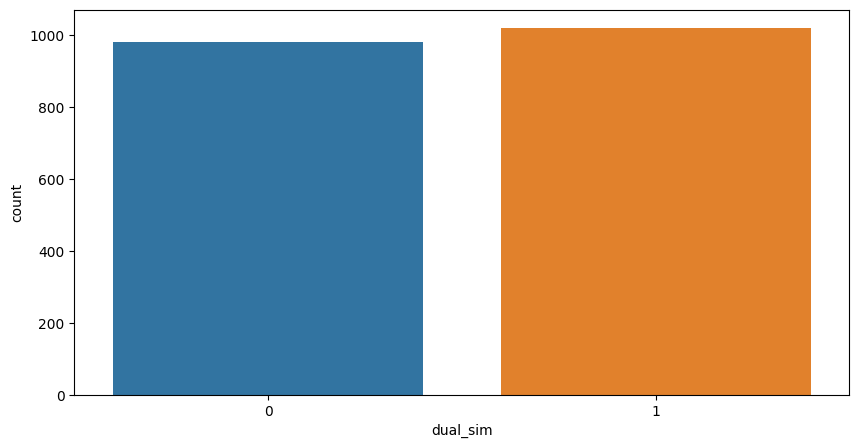

In [68]:
# We plot a graph for how many mobile had dual sim
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='dual_sim')

#### 1. Why did you pick the specific chart?

In this chart we presented mobile are dual sim this chart esay to uderstand  how many mobile hvae dare not

#### 2. What is/are the insight(s) found from the chart?

In this chart we seen dual sim mobile max as compear to single sim mobile.

<Axes: xlabel='blue', ylabel='count'>

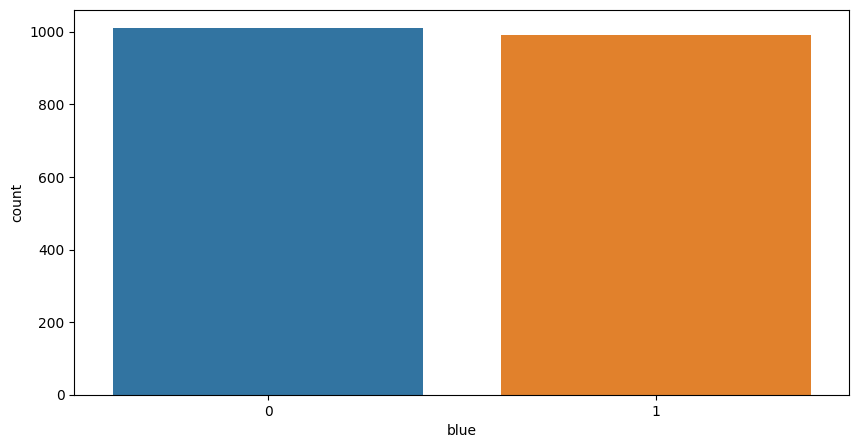

In [69]:
# We plot a graph for how many mobile had bluetooth
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='blue')

#### 1. Why did you pick the specific chart?

In this chart we presented bluetooth columns , this chart esay to uderstand  how many mobile hvae bluetooth are not




#### 2. What is/are the insight(s) found from the chart?

In this plot we seen how many mobile have bluetooth it is nearly same.

<Axes: xlabel='touch_screen', ylabel='count'>

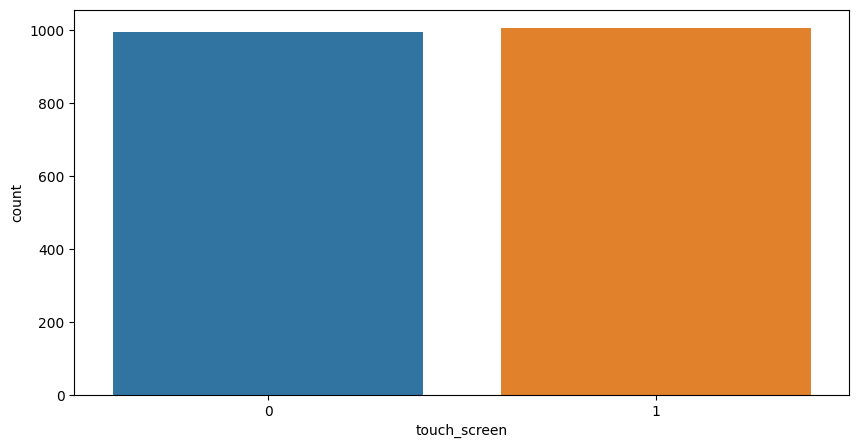

In [70]:
# We plot a graph for how many mobile had touch screen and how many not
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='touch_screen')

#### 1. Why did you pick the specific chart?

In this chart we presented mobile touch screen this chart esay to uderstand  how many mobile hvae touch screen are not 

#### 2. What is/are the insight(s) found from the chart?

In this plot we seen touch screen mobile are max as compeare to non touch screen mobile

<Axes: xlabel='fc', ylabel='count'>

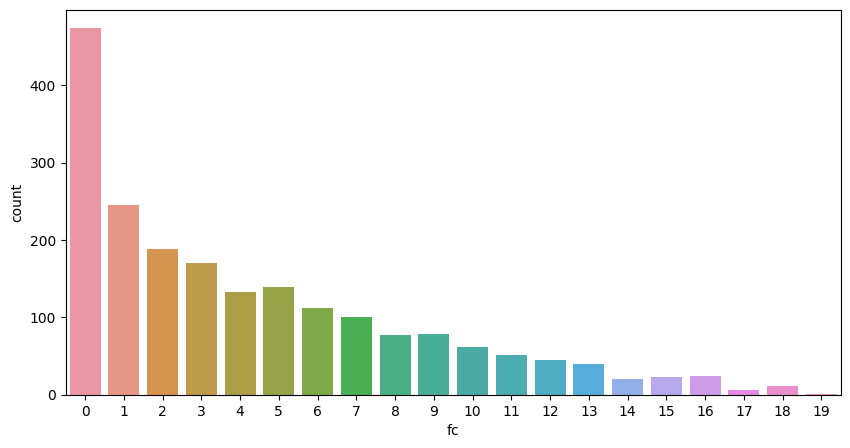

In [71]:
# We plot a graph for how many mobile had front camera how many not and how many mega pixcel 
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='fc')

#### 1. Why did you pick the specific chart?

In this chart we presented mobile fc columns this chart esay to uderstand  how many mobile have front camera are not and how many mega pixcel is easy to understand in this chart

#### 2. What is/are the insight(s) found from the chart?

In this plot we seen above 400 mobile not have front camera 

<Axes: xlabel='n_cores', ylabel='count'>

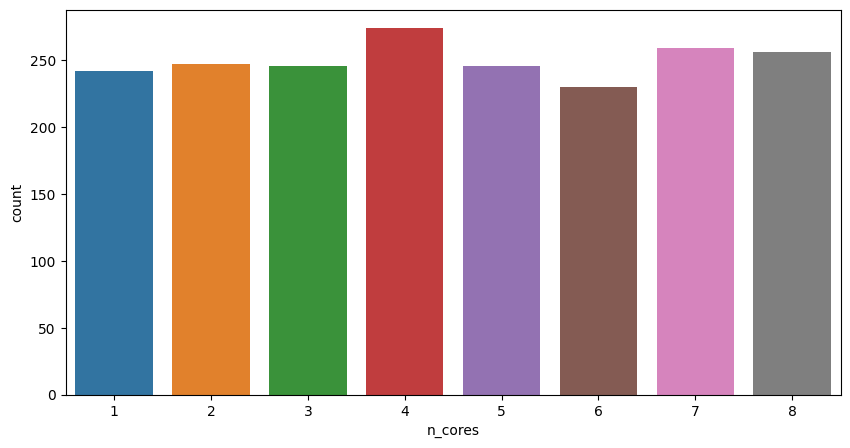

In [72]:
# We plot a graph for how many mobile had  how many n_core processor 
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='n_cores')

#### 1. Why did you pick the specific chart?

We use this chart to seen how many cores processor mobile we have 

#### 2. What is/are the insight(s) found from the chart?

In this chart we seen 8 n_cores we have an out of this 8 processor 4 n_processor had maximum moile

NOW WE PLOT GRAPH FOR  FINDING RELESTIONSHIP BETWEEN TWO VARIABLE:

<Axes: xlabel='price_range', ylabel='ram'>

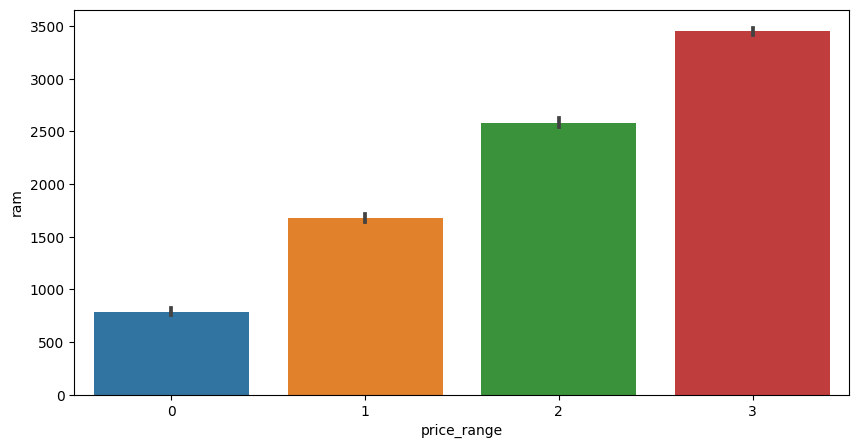

In [73]:
# we plot graph for price range and ram 
plt.figure(figsize=(10,5))
sns.barplot(data=df,x = df['price_range'],y="ram")

#### 1. Why did you pick the specific chart?

We use this barplot for ram and price range visulaization

#### 2. What is/are the insight(s) found from the chart?

In this graph we seen 0 class had low ram and 3 class had maximum ram

<Axes: xlabel='price_range', ylabel='ram'>

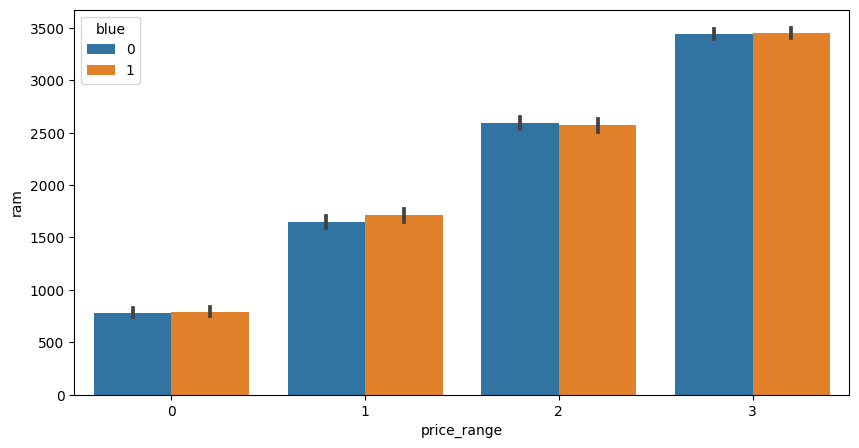

In [74]:
# we plot graph for price range and ram and bluetooth
plt.figure(figsize=(10,5))
sns.barplot(data=df,x = df['price_range'],y="ram",hue='blue')

#### 1. Why did you pick the specific chart?

We use this barplot for ram and price range and blurtooth visulaization

#### 2. What is/are the insight(s) found from the chart?

In this plot we seen in all class eqval mobile they had bluetooth and not and class 3 had max ram mobile 

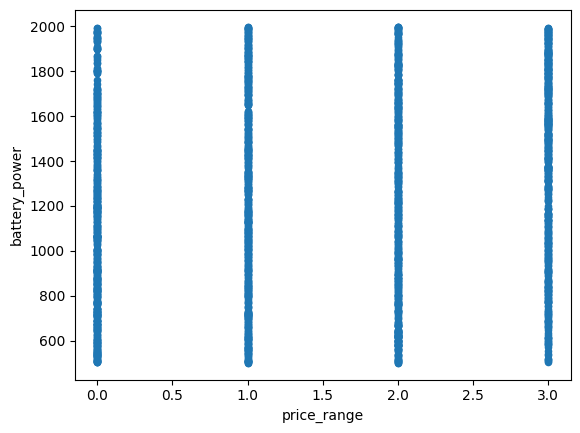

In [102]:
# Now we plot graph for price range and battery plot
df.plot(x="price_range",y="battery_power",kind="scatter")
plt.show()

#### 1. Why did you pick the specific chart?

We use scatter plot for finding relationship between battery power and price range

#### 2. What is/are the insight(s) found from the chart?

So we seen in this plot all class had eqval number of battery power mobile

NOW WE PLOT A BOXPLOT FOR FINDING OUTLIERS

<Axes: >

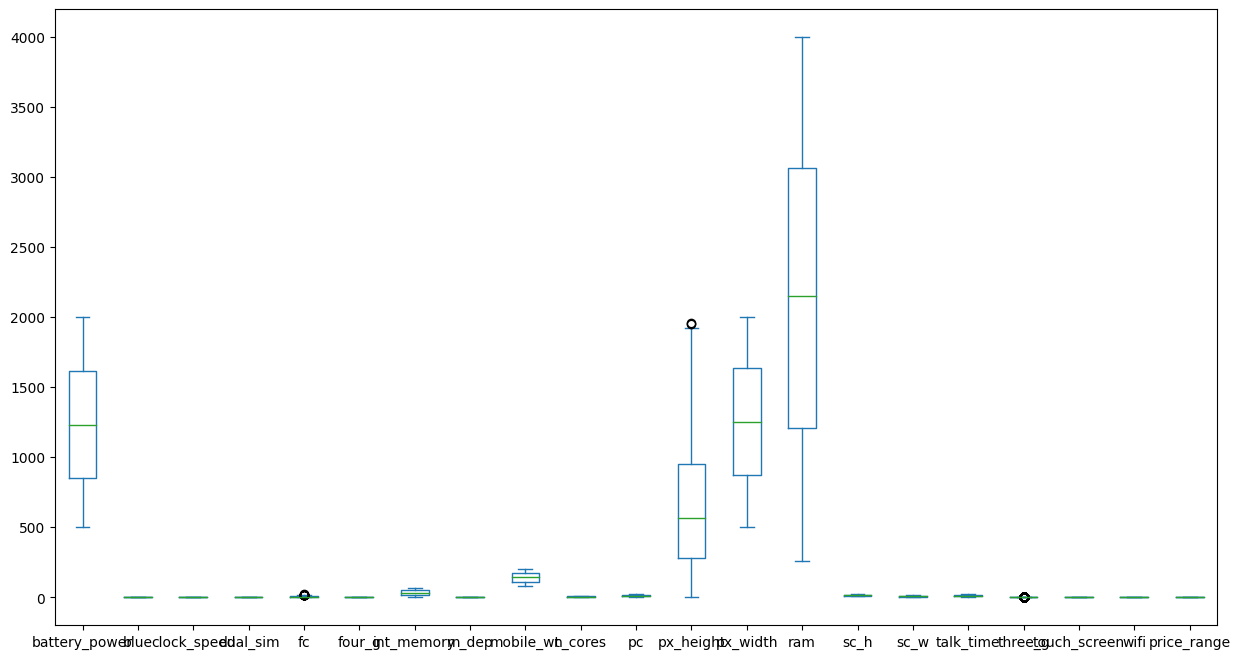

In [76]:
df.plot(kind="box",figsize=(15,8))

#### 1. Why did you pick the specific chart?

We use box plot finding outliers in all columns

#### 2. What is/are the insight(s) found from the chart?

In this plot we seen some columns outliers are present  but this point not out of range,so we can say that zero outliers are present in our datset 

## ***6. Feature Engineering & Data Pre-processing***

<Axes: >

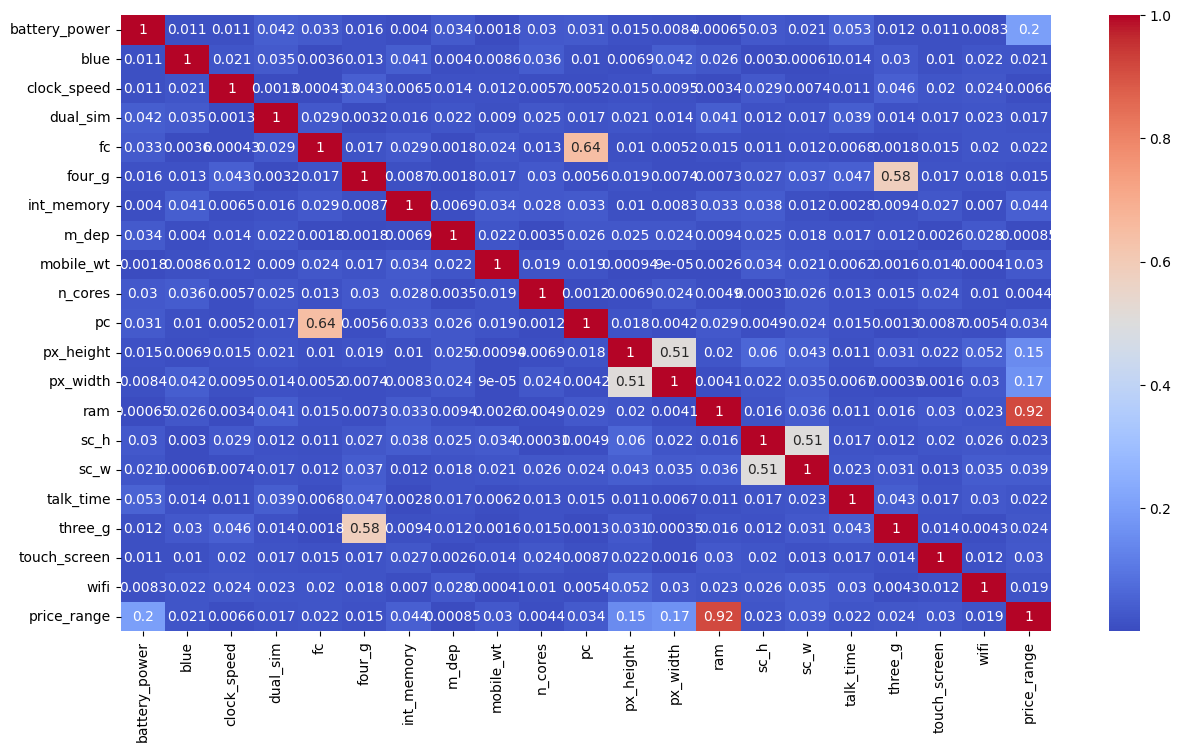

In [77]:
# Now we plot Correlation heatmap 
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

#### 1. Why did you pick the specific chart?

We plot heatmap for finding strength between two variable


#### 2. What is/are the insight(s) found from the chart?

1) In this plot we seen independent variable "RAM" had maximum correlation dependent variable "Price_range" it around 0.92

2)we also seen some independent variable had good correalation like "FOUR_G" and "THREE_G" is 0.58 , "SC_H" and "SC_W" is 0,51 and "FC" and "PC" is 0.64  

In [78]:
# Now we find Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [79]:
# now we find VIF value
calc_vif(df[[i for i in df.describe().columns if i not in ["price_range"]]])

,variables,VIF
0,battery_power,8.076717
1,blue,1.981927
2,clock_speed,4.260479
3,dual_sim,2.015006
4,fc,3.413529
5,four_g,3.194321
6,int_memory,3.961239
7,m_dep,3.911115
8,mobile_wt,12.972548
9,n_cores,4.646070


So we seen px_width,sc_h,mobile_wt this three variable had above 10 vif value 

In [80]:
calc_vif(df[[i for i in df.describe().columns if i not in ["price_range","px_width","mobile_wt","sc_h"]]])

,variables,VIF
0,battery_power,7.543843
1,blue,1.973935
2,clock_speed,4.097058
3,dual_sim,1.977691
4,fc,3.410551
5,four_g,3.191826
6,int_memory,3.840447
7,m_dep,3.791047
8,n_cores,4.449230
9,pc,6.104625


Now we seen all variable vif value is below 10.

## ***7. ML Model Implementation***

In [81]:
# import libaries
from scipy.stats import  zscore
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2 ,mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

###  Decision Tree Classifier

In [82]:
# dependent variabel
dependent_variabel = "price_range"

In [83]:
# independent variabel
independent_variabel = list(df.columns.drop(["price_range"]))
#List of independent variable
independent_variabel

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

In [84]:
X=df[independent_variabel].values

y=df[dependent_variabel].values

In [85]:
# Now we split the data for train and test
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(1600, 20)
(400, 20)


In [86]:
# we sacaling x values
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [87]:
X_train

array([[-1.60788581e-03, -9.65591606e-01,  1.67103471e+00, ...,
         5.64839529e-01, -9.86343245e-01, -1.02532046e+00],
       [ 1.37407489e+00, -9.65591606e-01, -1.27055019e+00, ...,
        -1.77041434e+00, -9.86343245e-01, -1.02532046e+00],
       [ 1.03920474e+00, -9.65591606e-01,  6.90506414e-01, ...,
         5.64839529e-01,  1.01384584e+00,  9.75304830e-01],
       ...,
       [-9.66386040e-02, -9.65591606e-01,  5.67940376e-01, ...,
        -1.77041434e+00, -9.86343245e-01,  9.75304830e-01],
       [-9.43759679e-02, -9.65591606e-01,  1.05820453e+00, ...,
         5.64839529e-01,  1.01384584e+00,  9.75304830e-01],
       [-1.19175450e+00, -9.65591606e-01, -1.27055019e+00, ...,
         5.64839529e-01, -9.86343245e-01,  9.75304830e-01]])

In [88]:
X_test

array([[ 0.50069734,  1.03563452, -1.27055019, ...,  0.56483953,
         1.01384584, -1.02532046],
       [-0.31837695,  1.03563452, -1.27055019, ..., -1.77041434,
         1.01384584, -1.02532046],
       [ 0.65908187,  1.03563452,  0.3228083 , ...,  0.56483953,
        -0.98634324,  0.97530483],
       ...,
       [-1.44516975,  1.03563452,  1.3033366 , ..., -1.77041434,
         1.01384584,  0.97530483],
       [ 0.99621466,  1.03563452,  0.07767623, ..., -1.77041434,
        -0.98634324, -1.02532046],
       [ 0.12962501, -0.96559161, -1.27055019, ..., -1.77041434,
         1.01384584,  0.97530483]])

In [89]:
# Now we use decision tree algorithum
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [90]:
pred=dtc.predict(X_test)

In [91]:
# now we find accuracy score of decision tree and confusion_matrix
from sklearn.metrics import accuracy_score ,confusion_matrix
dtc_acc=accuracy_score(pred,y_test)
print(dtc_acc)
print(confusion_matrix(pred,y_test))

0.82
[[ 86   8   0   0]
 [  9  69  12   1]
 [  0  15  73  13]
 [  0   0  14 100]]


In decision tree classifire accuracy score in 0.82

### Support Vector classifire

In [92]:
# Now we use support vector classifire
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)

SVC()

In [93]:
pred1=sv.predict(X_test)
pred1

array([3, 0, 2, 1, 3, 0, 0, 2, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 1, 0, 1, 0, 2, 3, 0, 0, 3, 3, 3, 2, 3, 3,
       1, 3, 0, 2, 3, 1, 1, 2, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 2, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 2, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 0, 0, 3, 3, 3, 0, 3, 1, 1, 2, 1, 3, 2, 2, 3, 2, 3,
       2, 0, 0, 1, 2, 3, 0, 1, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 1, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 1, 0, 3, 1, 3, 2, 1, 2, 1, 2, 3, 3, 3, 1, 0, 3, 1, 2, 3, 3, 0,
       1, 2, 3, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 3, 1, 1, 1, 2, 3, 0, 0, 2,
       2, 0, 3, 3, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       2, 3, 0, 0, 2, 3, 3, 1, 0, 2, 0, 0, 0, 3, 2, 1, 2, 2, 1, 1, 1, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       2, 2, 1, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [94]:
#  now we find accuracy score of support vector classifire and confusion_matrix
sv_acc=accuracy_score(pred1,y_test)
print(sv_acc)
print(confusion_matrix(pred1,y_test))

0.89
[[ 89   4   0   0]
 [  6  82  12   0]
 [  0   6  83  12]
 [  0   0   4 102]]


Support vector classifire accuracy score is 0.89

### Logestic Rigresstion

In [95]:
# Now we use logistic Rigression 
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression()

In [96]:
pred2=lr.predict(X_test)
pred2

array([3, 0, 2, 2, 3, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 3, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 1, 2, 1, 0, 1, 2, 2, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 2, 3, 3, 1, 0, 2, 0, 0, 0, 3, 2, 1, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 3, 0, 1, 3, 0, 2, 2, 3, 0, 2, 0, 1,

In [97]:
#  now we find accuracy score of LogisticRegression and confusion_matrix
lr_acc=accuracy_score(pred2,y_test)
print(lr_acc)
print(confusion_matrix(pred2,y_test))

0.955
[[ 93   2   0   0]
 [  2  85   3   0]
 [  0   5  91   1]
 [  0   0   5 113]]


Accuracy score for logistic Regression is 0.995

Now we plot all algoritham accuracy score 

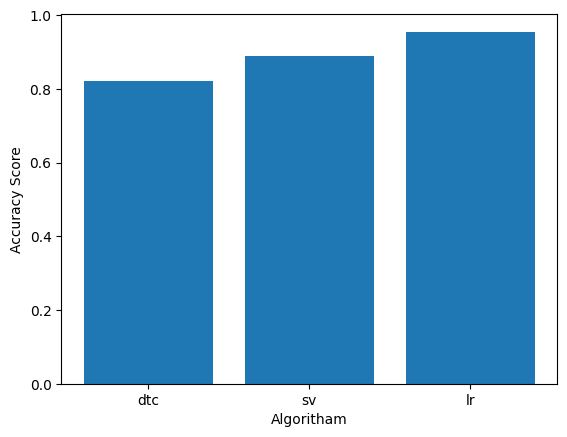

In [100]:
# useing bar plot we plot all accuracy score 
plt.bar(x=["dtc","sv","lr"],height=[dtc_acc,sv_acc,lr_acc])
plt.xlabel("Algoritham")
plt.ylabel("Accuracy Score")
plt.show()


In this bar plot we clearly seen Logistic Regression are good accuracy score is 95% so we can say that Logistic Regression is good for this dataset.

#**Conclusion**

Clearly,from our observations,Logistic Regression is giving us significantly better accuracy that is 95% compared with support vector classifire  accuracy  is  82.5%,Decision Tree Classifier accuracy is  83.25%. So we will prefer Logistic Regression over all classifire to detect price ranges of test data based on provide training data.   

#**THANKS**